# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

This is the US Dollar (USD) to Indonesian Rupiah (IDR) rate historical data from March 6, 2023 to September 1, 2023

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [5]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [6]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [7]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [26]:
print(soup.prettify()[:10])

<!DOCTYPE 


In [27]:
table = soup.find('table', attrs={'class': 'history-rates-data'})
print(table.prettify()[1:10])

table bor


In [28]:
table = soup.find('tbody')
print(table.prettify()[1:10])

tbody>
 <


In [11]:
table.find_all('tr')

[<tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">September 1, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-09-01">2023-9-1</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowra

In [12]:
table.find_all('a', attrs={'class': 'w'})

[<a class="w" href="/exchange-rate-history/usd-idr-2023-09-01">September 1, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-30">August 30, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-29">August 29, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-28">August 28, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-25">August 25, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-24">August 24, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-23">August 23, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-22">August 22, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-21">August 21, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-18">August 18, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-17">August 17, 

In [13]:
table.find_all('span', attrs={'class': 'w'})

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,258</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,202</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,248</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,298</span></span>

In [14]:
table.find_all('a', attrs={'class': 'w'})[1].text

'August 31, 2023'

In [15]:
table.find_all('span', attrs={'class': 'w'})[1].text


'$1 = Rp15,225'

### Finding Row Length

In [16]:
row = table.find_all('a', attrs={'class': 'w'})
row_length = len(row)
row_length

130

Since the website provide a time series of exchange rate of USD to IDR, and provided rate exchange and date data. i examine the data and scrap the rate and date data using beutifulsoup.

In [17]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #Date
    date = table.find_all('a', attrs={'class': 'w'})[i].text
    date = date.strip()
    
    #Rate Dollar to IDR 
    rate = table.find_all('span', attrs={'class': 'w'})[i].text
    rate = rate.strip()
    
    
    temp.append((date, rate))
temp 

[('September 1, 2023', '$1 = Rp15,258'),
 ('August 31, 2023', '$1 = Rp15,225'),
 ('August 30, 2023', '$1 = Rp15,223'),
 ('August 29, 2023', '$1 = Rp15,202'),
 ('August 28, 2023', '$1 = Rp15,248'),
 ('August 25, 2023', '$1 = Rp15,298'),
 ('August 24, 2023', '$1 = Rp15,246'),
 ('August 23, 2023', '$1 = Rp15,301'),
 ('August 22, 2023', '$1 = Rp15,324'),
 ('August 21, 2023', '$1 = Rp15,325'),
 ('August 18, 2023', '$1 = Rp15,321'),
 ('August 17, 2023', '$1 = Rp15,343'),
 ('August 16, 2023', '$1 = Rp15,369'),
 ('August 15, 2023', '$1 = Rp15,318'),
 ('August 14, 2023', '$1 = Rp15,330'),
 ('August 11, 2023', '$1 = Rp15,324'),
 ('August 10, 2023', '$1 = Rp15,263'),
 ('August 9, 2023', '$1 = Rp15,214'),
 ('August 8, 2023', '$1 = Rp15,212'),
 ('August 7, 2023', '$1 = Rp15,225'),
 ('August 4, 2023', '$1 = Rp15,153'),
 ('August 3, 2023', '$1 = Rp15,148'),
 ('August 2, 2023', '$1 = Rp15,227'),
 ('August 1, 2023', '$1 = Rp15,121'),
 ('July 31, 2023', '$1 = Rp15,099'),
 ('July 28, 2023', '$1 = Rp15,10

In [18]:
temp = temp[::-1]
temp

[('March 6, 2023', '$1 = Rp15,354'),
 ('March 7, 2023', '$1 = Rp15,429'),
 ('March 8, 2023', '$1 = Rp15,449'),
 ('March 9, 2023', '$1 = Rp15,495'),
 ('March 10, 2023', '$1 = Rp15,503'),
 ('March 13, 2023', '$1 = Rp15,416'),
 ('March 14, 2023', '$1 = Rp15,380'),
 ('March 15, 2023', '$1 = Rp15,459'),
 ('March 16, 2023', '$1 = Rp15,429'),
 ('March 17, 2023', '$1 = Rp15,375'),
 ('March 20, 2023', '$1 = Rp15,343'),
 ('March 21, 2023', '$1 = Rp15,301'),
 ('March 22, 2023', '$1 = Rp15,253'),
 ('March 23, 2023', '$1 = Rp15,085'),
 ('March 24, 2023', '$1 = Rp15,165'),
 ('March 27, 2023', '$1 = Rp15,107'),
 ('March 28, 2023', '$1 = Rp15,060'),
 ('March 29, 2023', '$1 = Rp15,034'),
 ('March 30, 2023', '$1 = Rp15,024'),
 ('March 31, 2023', '$1 = Rp14,969'),
 ('April 3, 2023', '$1 = Rp14,922'),
 ('April 4, 2023', '$1 = Rp14,957'),
 ('April 5, 2023', '$1 = Rp14,960'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 11, 2023', '

## Creating data frame & Data wrangling

Put the array into dataframe

In [19]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','rate'))
df.head()

,date,rate
0,"March 6, 2023","$1 = Rp15,354"
1,"March 7, 2023","$1 = Rp15,429"
2,"March 8, 2023","$1 = Rp15,449"
3,"March 9, 2023","$1 = Rp15,495"
4,"March 10, 2023","$1 = Rp15,503"


at first the data defaulty read as object which has the same type of data, to do a further process i need to clean data so the data can be processed.

In [20]:
df.dtypes

date    object
rate    object
dtype: object

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['rate'] = df['rate'].str.replace('$1 = Rp', '').str.replace(',', '')
df['rate'] = df['rate'].astype('float64')

df.dtypes

date    datetime64[ns]
rate           float64
dtype: object

In [22]:
print(df)

          date     rate
0   2023-03-06  15354.0
1   2023-03-07  15429.0
2   2023-03-08  15449.0
3   2023-03-09  15495.0
4   2023-03-10  15503.0
..         ...      ...
125 2023-08-28  15248.0
126 2023-08-29  15202.0
127 2023-08-30  15223.0
128 2023-08-31  15225.0
129 2023-09-01  15258.0

[130 rows x 2 columns]


## Data Wrangling Explanation

i use the rate over data to make it clearer with a purpose of scraping objectives

## Visualize The Data

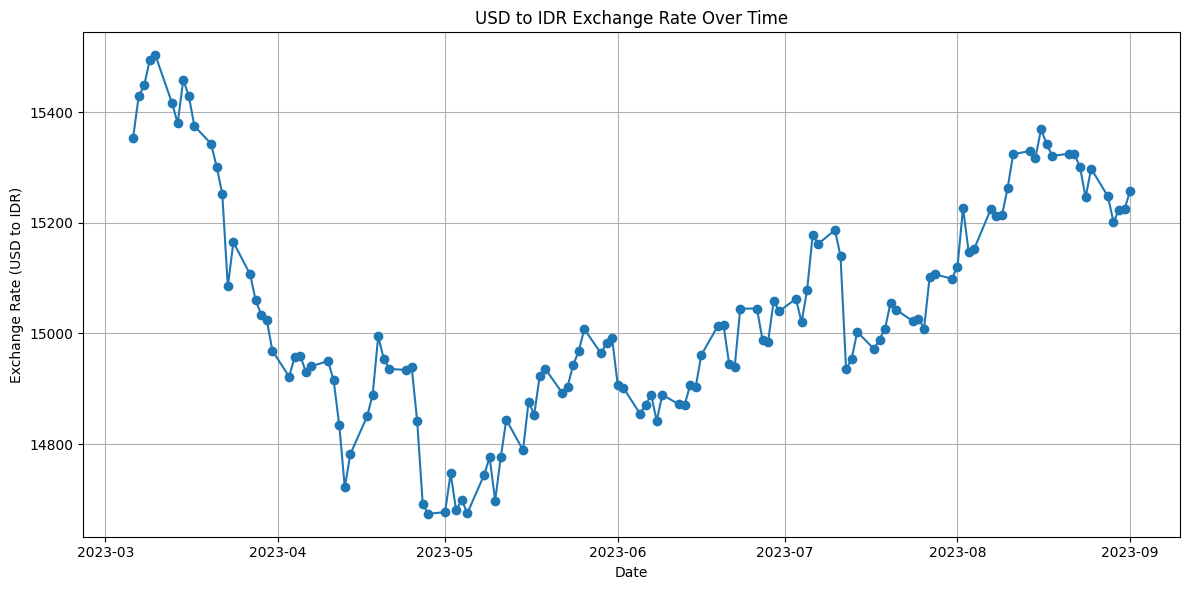

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rate'], marker='o', linestyle='-')
plt.title('USD to IDR Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to IDR)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

In [34]:
# Calculating the range, average, and identifying significant spikes or drops

# Determine the highest and lowest exchange rates
max_rate = df['rate'].max()
min_rate = df['rate'].min()
date_max_rate = df[df['rate'] == max_rate]['date'].iloc[0]
date_min_rate = df[df['rate'] == min_rate]['date'].iloc[0]

# Calculate the average exchange rate
average_rate = df['rate'].mean()

# Identify significant spikes or drops by calculating the difference between consecutive days
df['rate_difference'] = df['rate'].diff().abs()
largest_difference = df['rate_difference'].max()
date_largest_difference = df[df['rate_difference'] == largest_difference]['date'].iloc[0]

analysis_results = {
    "Max Rate": max_rate,
    "Date of Max Rate": date_max_rate,
    "Min Rate": min_rate,
    "Date of Min Rate": date_min_rate,
    "Average Rate": average_rate,
    "Largest Daily Difference": largest_difference,
    "Date of Largest Daily Difference": date_largest_difference
}

analysis_results


{'Max Rate': 15503.0,
 'Date of Max Rate': Timestamp('2023-03-10 00:00:00'),
 'Min Rate': 14674.0,
 'Date of Min Rate': Timestamp('2023-04-28 00:00:00'),
 'Average Rate': 15043.946153846155,
 'Largest Daily Difference': 205.0,
 'Date of Largest Daily Difference': Timestamp('2023-07-12 00:00:00')}

### Analysis 
Based on the detailed analysis of the USD to IDR exchange rate data:

- Max Rate: The highest exchange rate during this period was 15,502.55 IDR for 1 USD on March 10, 2023.
- Min Rate: The lowest exchange rate was 14,673.55 IDR for 1 USD on April 28, 2023.
- Average Rate: The average exchange rate over the observed period was approximately 15,043.93 IDR for 1 USD.
- Largest Daily Difference: The most significant change in the exchange rate from one day to the next was approximately 205.42 IDR on July 12, 2023.

These points provide some insights:

- The difference between the highest and lowest rates over this period is quite substantial, indicating volatility in the exchange rate.
- The large daily difference observed on July 12 suggests a significant event or set of circumstances that affected the USD to IDR rate on that day.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.